<a href="https://colab.research.google.com/github/amatyaagrata/ConceptandTechnologyofAI/blob/workshop4/Workshop4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
# Load dataset
df = pd.read_csv('/content/diabetes_.csv')
# Display first few rows
df.head()
# Basic information
df.info()
# Summary statistics
df.describe()
# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [16]:
#EDA obervations
#The dataset contains numeric medical attributes such as glucose, blood pressure, BMI, etc.
#Target variable: **Outcome** (0 = Non-diabetic, 1 = Diabetic).
#No explicit missing values, but some columns may contain zeros which are medically invalid.
#HANDLING MISSING DATA
#In this dataset, zeros in certain columns represent missing values.We replace zeros with the **mean of the column**
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero:
    df[col] = df[col].replace(0, df[col].mean())
print(df[col])

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64


3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.

In [17]:
# Separate features and target
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values
print("X")
print(X)
print("y")
print(y)



X
[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
y
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0

In [18]:
# Train-test split (70-30)
np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(0.7 * len(X))
print("Indices")
print(indices)
print("Train_size")
print(train_size)

train_idx = indices[:train_size]
print("Train_idx")
print(train_idx)
test_idx = indices[train_size:]
print("Test_idx")
print(test_idx)

X_train, X_test = X[train_idx], X[test_idx]
print("X_train")
print(X_train)
print("X_test")
print(X_test)
y_train, y_test = y[train_idx], y[test_idx]
print("y_train")
print(y_train)
print("y_test")
print(y_test)

Indices
[668 324 624 690 473 204  97 336 568 148 667 212 199 265 760 356 501 457
 604 213 636 544  86 208 281 209 581 639 328 431 120 363 425 300  67 338
 579  66 582  78 482 456  30 635  33  31  39  77 299 487 629 516 375 451
 511 234 361 494 692 404 754 764 519 254 483 211 210  84 239 409  54 720
 512 109 587 362 734 396 528  10 192 448 174 428 181 748 155 309  65 331
 137 350  81 468 405 470 250 490 220  76 548 290  72 244 394 620  63 716
 659 314 118 728  49 662 411 605 227 168 513   7 196 275  23 383 101 763
 706 259 193 549   2 215 382 648 606 714 731 691 603 617  79 694 433 486
 677 133 218  55 725 355 534 344 296 462  60 618 346 294 231 340 535 306
 718  90 377 235 158  69 260 131  44  70 264 673 286 640 135 745 165 164
  28 608 583 746 292 136 432 554 319 594   6 615 357  73 352 497 145 514
 291 132 559 631 719 395  41 637 108 481  56 323 685 758 572 529  24 465
 247 443 351 327 110  82  51 449 762 703 619 198 538 329 302 334 139 485
 547  18 593 140 326 266 626  83  61 632 73

Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.

Euclidean distance

In [19]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


Single point

In [20]:
# Predict Single Point
def predict_single(x, X_train, y_train, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(x, X_train[i])
        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])
    k_neighbors = distances[:k]

    labels = [label for _, label in k_neighbors]
    return max(set(labels), key=labels.count)

test samples

In [21]:
# Predict All Test Samples

def predict(X_test, X_train, y_train, k):
    predictions = []
    for x in X_test:
        predictions.append(predict_single(x, X_train, y_train, k))
    return np.array(predictions)

Accuracy

In [22]:
#### Accuracy

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Run KNN with k=5
k = 5
y_pred = predict(X_test, X_train, y_train, k)
acc_original = accuracy(y_test, y_pred)
acc_original

np.float64(0.7316017316017316)


Problem - 2 - Experimentation:
1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.
2. Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.
• Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.

In [23]:
# Problem 2: Experimentation with Feature Scaling

# 1. Feature Scaling (Standardization)
def standardize(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

X_scaled = standardize(X)
# Train-test split again
X_train_s, X_test_s = X_scaled[train_idx], X_scaled[test_idx]

# Run KNN on scaled data
y_pred_scaled = predict(X_test_s, X_train_s, y_train, k)
acc_scaled = accuracy(y_test, y_pred_scaled)
acc_scaled


# Comparative Analysis

#Original Accuracy:** {:.4f}
#Scaled Accuracy:** {:.4f}

#Explanation:
#KNN relies on distance calculations. Feature scaling ensures all features contribute equally, improving performance.


np.float64(0.7445887445887446)

2. Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.
• Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.

In [24]:
# Problem 3: Experimentation with k

# 1. Vary k from 1 to 15
k_values = range(1, 16)
acc_orig_list = []
acc_scaled_list = []
time_orig = []
time_scaled = []

for k in k_values:
    # Original
    start = time.time()
    y_pred = predict(X_test, X_train, y_train, k)
    time_orig.append(time.time() - start)
    acc_orig_list.append(accuracy(y_test, y_pred))

    # Scaled
    start = time.time()
    y_pred_s = predict(X_test_s, X_train_s, y_train, k)
    time_scaled.append(time.time() - start)
    acc_scaled_list.append(accuracy(y_test, y_pred_s))

2. Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.
– k vs. Time Taken for original and scaled datasets.

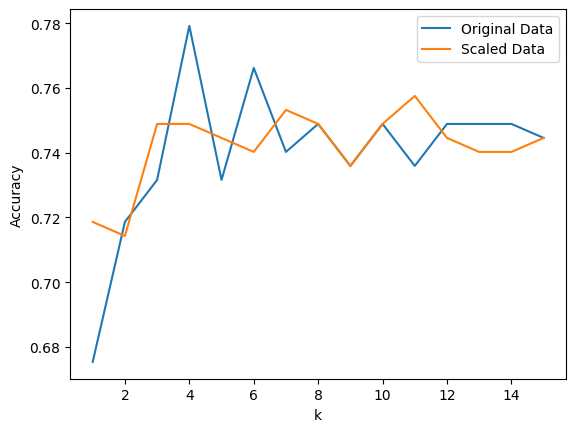

In [26]:
plt.figure()
plt.plot(k_values, acc_orig_list, label='Original Data')
plt.plot(k_values, acc_scaled_list, label='Scaled Data')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.

Small k (e.g., 1) may overfit and be sensitive to noise.

Large k increases computation and may underfit.

Scaled data consistently performs better.

Optimal k: Typically between 5 and 9, where accuracy stabilizes.